## Project Name  - Exploratory Data Analysis of Amazon Prime Videos Content Library
----

# Project Summary
The goal of this project is to analyze Amazon Prime's global content library using some data analysis techniques — to understand what kind of shows and movies dominate the platform, and what insights we can extract from content performance over time.

**Some key steps:**

**Data Collection & Cleaning:**
Two datasets—one containing title-level metadata and the other credit-level information—were merged for a comprehensive view. The data underwent thorough preprocessing to handle missing values, eliminate duplicates, and ensure consistency for accurate analysis.

**Data Visualization:**
Multiple visualization techniques were used, such as box plots, histograms, bar plots, scatter plots, line plots, pie charts, violin plots, and heatmaps, to explore relationships and detect meaningful patterns across various features.

**Key Insights Discovered:**
- Movies outnumber TV shows on the platform, with drama and comedy as the most dominant genres.
- Movie runtimes have gradually decreased over the years, while TV shows tend to have more seasons.
- Older content generally receives higher IMDb ratings compared to more recent releases.
- The United States is the leading content producer, followed by India and the United Kingdom.

**In conclusion,** this EDA project helped me extract valuable insights from Amazon Prime’s content library.It taught me how to clean and visualize data, interpret patterns, and communicate actionable business recommendations.

## GitHub Link 

https://github.com/harshitaarora1102/EDA-project-on-Amazon-Prime-Videos/tree/main

## Problem Statements
The project is driven by three core questions:

**Content Diversity** : Understanding the dominant genres and categories on Amazon Prime is essential for strategic content planning. This analysis focuses on identifying the platform’s content diversity to support decision-making in content acquisition and development.

**Trends Over Time** : The entertainment landscape evolves rapidly. This problem statement emphasizes the need to analyze how Amazon Prime’s content library has changed over the years in response to viewer preferences and market trends.

**IMDb Ratings & Popularity** : IMDb ratings and popularity metrics are critical indicators of viewer engagement and content success. This analysis aims to uncover patterns in highly-rated and popular content to guide future recommendations and improvements.

##### Business Objective:

To analyze the performance and characteristics of movies and shows on Amazon Prime Video in order to uncover patterns in viewer ratings, popularity, content types, and personnel involvement — and to provide actionable insights that can help improve content strategy, audience targeting, and platform engagement.

----

### Import Libraries
several essential Python libraries to support data analysis and visualization:

In [ ]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set(style="white")

import warnings
warnings.filterwarnings('ignore')

## Dataset Loading

In [47]:
titles_df = pd.read_csv('titles.csv')
credits_df = pd.read_csv('credits.csv')

### Merge Data 

## Merging datasets on common column 'id'
merged_df = pd.merge(titles_df, credits_df, on='id', how='left')

# Print the merged dataset
merged_df.head(3)

# Dataset Rows & Columns count

In [49]:
merged_df.shape

(125354, 19)

In [50]:
# Dataset Columns
merged_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')

# Dataset Information

In [51]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125354 entries, 0 to 125353
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    125354 non-null  object 
 1   title                 125354 non-null  object 
 2   type                  125354 non-null  object 
 3   description           125163 non-null  object 
 4   release_year          125354 non-null  int64  
 5   age_certification     56857 non-null   object 
 6   runtime               125354 non-null  int64  
 7   genres                125354 non-null  object 
 8   production_countries  125354 non-null  object 
 9   seasons               8501 non-null    float64
 10  imdb_id               119978 non-null  object 
 11  imdb_score            118987 non-null  float64
 12  imdb_votes            118957 non-null  float64
 13  tmdb_popularity       124800 non-null  float64
 14  tmdb_score            114263 non-null  float64
 15  

# Dataset Description
This merged dataset is derived from two primary sources --> titles.csv and credits.csv, both of which provide metadata and personnel information for movies and TV shows available on a popular streaming platform Amazon Prime Video.

`titles.csv` : Contains metadata about movies and TV shows.

`credits.csv` : Contains information about people involved in those titles (actors, directors, etc.).


Column | Definition
--- | -----------
id | Unique ID for each title (used to merge the files)
title | Name of the movie or show
type | Whether it's a MOVIE or SHOW
description | Short summary of the content
release_year | Year the content was released
age_certification | Age rating like PG, R, TV-MA, etc.
runtime | Duration in minutes (for shows, per episode)
genres | List of genres (e.g. Drama, Comedy)
production_countries | Country where the content was produced
seasons | Number of seasons (for shows only)
imdb_score | IMDb rating out of 10
tmdb_score | TMDB rating out of 10
tmdb_popularity | Popularity score from TMDB
imdb_votes | Number of votes on IMDb
name | Name of the actor/director/crew member
character | Character name (if role is ACTOR)
role | Role in the production (e.g., ACTOR, DIRECTOR)

### Missing Values/Null Values
During the data cleaning phase, one of the most important steps was handling missing or null values, which were present in multiple columns.

In [52]:
merged_df.isnull().sum()

id                           0
title                        0
type                         0
description                191
release_year                 0
age_certification        68497
runtime                      0
genres                       0
production_countries         0
seasons                 116853
imdb_id                   5376
imdb_score                6367
imdb_votes                6397
tmdb_popularity            554
tmdb_score               11091
person_id                 1007
name                      1007
character                17314
role                      1007
dtype: int64

### Handling - Missing Values/Null Values

For categorical columns like genre, country, and content type, I replaced missing values with the mode — which is the most frequent value in that column. This helps maintain the distribution of popular categories.

For numerical columns like IMDb rating or runtime, I used the median instead of the mean to fill missing values, because the median is less affected by outliers and gives a more balanced replacement.

In some cases, especially for text-based columns like director or cast, I replaced null values with a placeholder like ‘Unknown’ or ‘Not Listed’. This way, those records could still be included in charts and counts without being dropped.

 **Numerical Columns :**

In [53]:
# Fill 'imdb_score' with the mean value
merged_df['imdb_score'].fillna(merged_df['imdb_score'].mean(), inplace=True)

# Fill 'imdb_votes' with median (due to potential outliers)
merged_df['imdb_votes'].fillna(merged_df['imdb_votes'].median(), inplace=True)

# Fill 'runtime' with median as well
merged_df['runtime'].fillna(merged_df['runtime'].median(), inplace=True)


**Categorical Columns :**

In [54]:
# Fill 'age_certification' with mode (most common value)
merged_df['age_certification'].fillna(merged_df['age_certification'].mode()[0], inplace=True)

# Fill 'seasons' with 0 for movies
merged_df['seasons'] = merged_df['seasons'].fillna(0) 


**List-Based Columns (Stored as Strings) :**

In [55]:
# Fill empty list where genres or countries are missing

merged_df['genres'] = merged_df['genres'].apply(lambda x: [] if pd.isnull(x) else x)
merged_df['production_countries'] = merged_df['production_countries'].apply(lambda x: [] if pd.isnull(x) else x)


In [56]:
# handling null values in all the columns

In [57]:
# Won’t affect analysis, keeps text field intact
merged_df['description'].fillna('No description available', inplace=True) 

# Ensures consistent ID format
merged_df['imdb_id'].fillna('unknown', inplace=True) 

# Popularity is skewed (outliers), so median is safer
merged_df['tmdb_popularity'].fillna(merged_df['tmdb_popularity'].median(), inplace=True)

# Scores are usually normal-distributed
merged_df['tmdb_score'].fillna(merged_df['tmdb_score'].mean(), inplace=True)

# Keeps credit data intact
merged_df['name'].fillna('unknown', inplace=True) 

# Often missing for extras, doesn’t break analysis
merged_df['character'].fillna('Not specified', inplace=True) 

# Keeps role categorization functional
merged_df['role'].fillna('unknown', inplace=True) 

# Ensures consistent ID format
merged_df['person_id'].fillna('unknown', inplace=True) 


double-checked to make sure that no important nulls remained that could affect plotting, or modeling later on.

In [58]:
merged_df.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
character               0
role                    0
dtype: int64

### Duplicate Values
Handling duplicate records was another important part of the data cleaning process.

In [59]:
merged_df.duplicated().sum()

168

This helped make sure every row in the dataset represented one unique title, ensuring the insights were clean and accurate.

In [60]:
# Drop all the duplicate values

merged_df = merged_df.drop_duplicates()
merged_df.duplicated().sum()

0

In [61]:
# Datatypes
merged_df.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
person_id                object
name                     object
character                object
role                     object
dtype: object

In [62]:
# Dataset Describe
merged_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,125186.000000,125186.000000,125186.000000,125186.000000,1.251860e+05,125186.000000,125186.000000
mean,1996.448261,95.348018,0.158588,5.971373,2.202464e+04,10.119200,5.992498
std,27.703798,30.393953,1.012580,1.212604,8.607372e+04,40.604733,1.263637
min,1912.000000,1.000000,0.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1983.000000,83.000000,0.000000,5.300000,3.110000e+02,1.875000,5.400000
50%,2009.000000,93.000000,0.000000,6.000000,1.227000e+03,3.864000,6.000000
75%,2018.000000,109.000000,0.000000,6.800000,6.268000e+03,8.773000,6.800000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Data Visualization
Data Visualization is the graphical representation of information and data using charts, graphs, and plots. It helps in understanding trends, patterns, and outliers in data, making complex information easier to interpret and communicate.

In [63]:
merged_df.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR


### Univariate Analysis 
Univariate analysis involves examining a single variable at a time.

**Countplot**

A Countplot is a barplot that shows the count (frequency) of each category in a categorical feature.

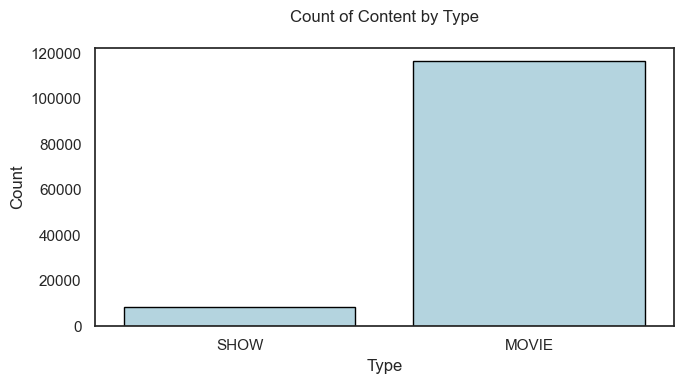

In [64]:
# Count of content by type

plt.figure(figsize=(7, 4))
sns.countplot(data=merged_df, x='type', color='lightblue', edgecolor='black')
plt.title('Count of Content by Type\n')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# It displays the total number of Movies and Shows available on Amazon Prime.
# Insight : Movies are produced more frequently than Shows on the platform.

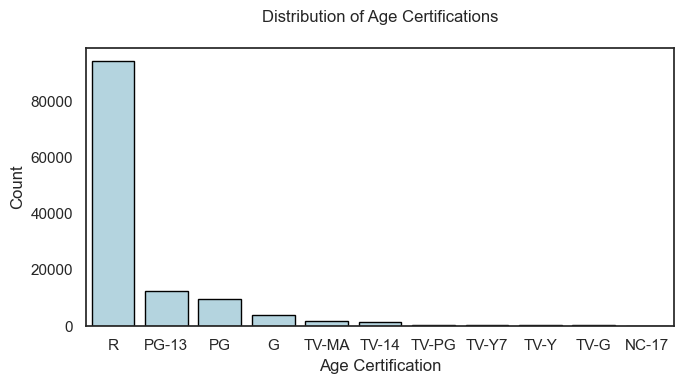

In [65]:
# Age Certification Distribution

plt.figure(figsize=(7, 4))
sns.countplot(data=merged_df, x='age_certification', order=merged_df['age_certification'].value_counts().index, color='lightblue', edgecolor='black')
plt.title('Distribution of Age Certifications\n')
plt.xlabel('Age Certification')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# It shows how many titles fall under each age certification category (e.g., PG, R, TV-MA).
# Insight : Most content on Amazon Prime is certified for mature audiences, indicating a focus on adult-oriented content.
# R-rated content tends to be targeted at mature audiences, while PG-13 has broader appeal, especially in action and fantasy genres.

**Barplot**

A Barplot displays categorical data with rectangular bars. The height of each bar represents the value or frequency of that category.

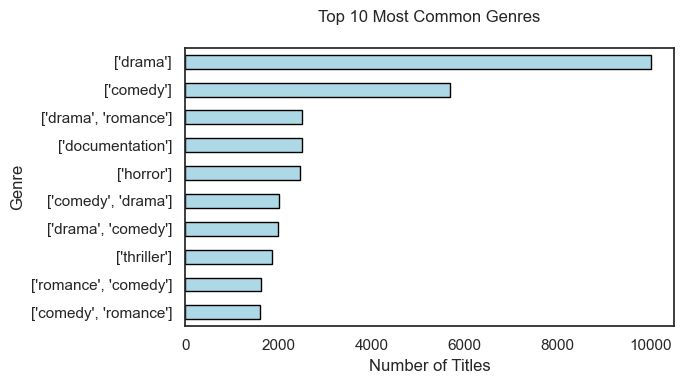

In [66]:
# Top 10 genres

plt.figure(figsize=(7, 4))
merged_df['genres'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color='lightblue', edgecolor='black')
plt.title('Top 10 Most Common Genres\n')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# It displays the top 10 most frequently appearing genres in Amazon Prime content.
# Insight : Drama and Comedy are the most dominant genres, reflecting audience demand for emotional and entertaining content.

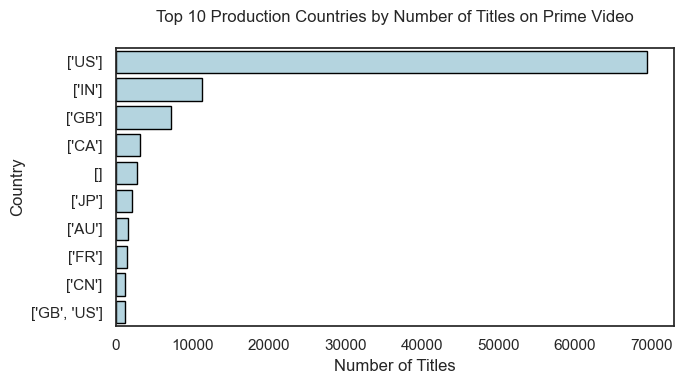

In [67]:
# Barplot of Production Countries

# Explode the list of production countries
exploded_countries = merged_df.explode('production_countries')

# Count occurrences of each country
country_counts = exploded_countries['production_countries'].value_counts().sort_values(ascending=False)

# Plot the top 10 countries
plt.figure(figsize=(7, 4))
sns.barplot(x=country_counts.head(10).values, y=country_counts.head(10).index, color='lightblue', edgecolor='black')

plt.title('Top 10 Production Countries by Number of Titles on Prime Video\n')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Shows top 10 countries creating content
# This bar chart highlights that the U.S. is the leading content producer, followed by India and the United Kingdom.
# Insight : USA dominates; useful for business targeting

**KDE Plot**

A KDE Plot (Kernel Density Estimate) shows a smooth curve that represents the distribution of a numerical variable.

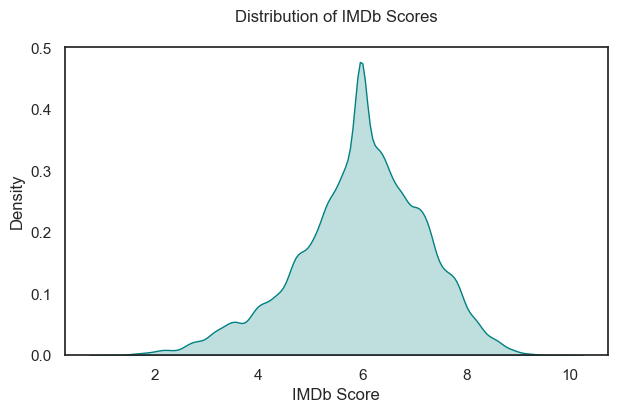

In [68]:
# KDE Plot – IMDb Score Distribution

plt.figure(figsize=(7,4))
sns.kdeplot(data=merged_df, x='imdb_score', fill=True, color='teal')
plt.title('Distribution of IMDb Scores\n')
plt.xlabel('IMDb Score')
plt.ylabel('Density')
plt.show()

# It shows Density distribution of IMDb ratings across all titles.
# Insight : Most IMDb scores range between 6 and 7.

**Histogram**

A Histogram is a graphical representation of the distribution of a numerical variable. It groups data into intervals (bins) and shows the frequency of data points within each bin using bars.

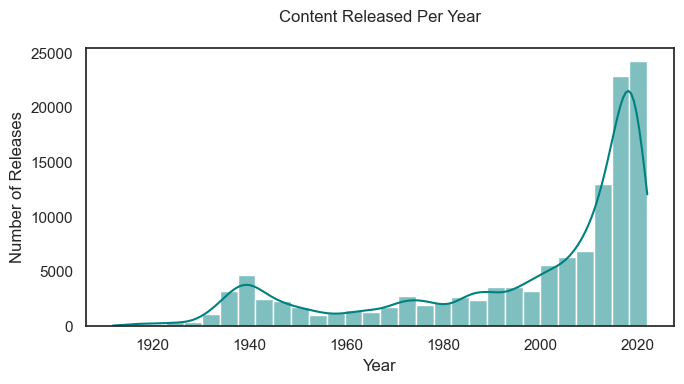

In [69]:
# Number of Releases per Year using a Histogram

plt.figure(figsize=(7, 4))
sns.histplot(data=merged_df, x='release_year', bins=30, kde=True, color='teal')
plt.title("Content Released Per Year\n")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.tight_layout()
plt.show()

# In this line chart, we observe that the number of content releases peaked around 2019, just before the pandemic.
# and there's a slight dip in 2020.

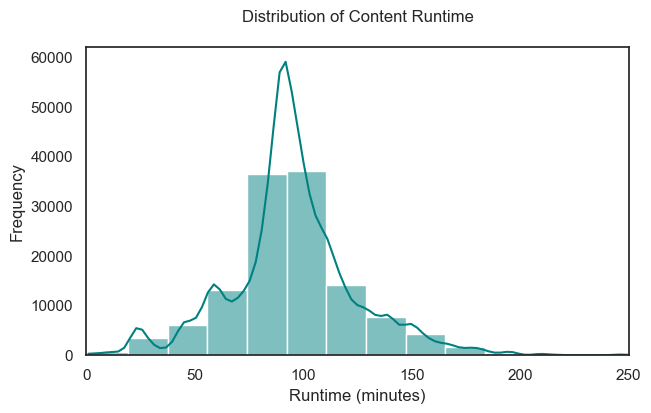

In [70]:
# Distribution of Content Runtime

plt.figure(figsize=(7,4))
sns.histplot(data=merged_df, x='runtime', kde=True, bins=30, color='teal')
plt.title('Distribution of Content Runtime\n')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 250)  # optional to limit extreme outliers
plt.show()


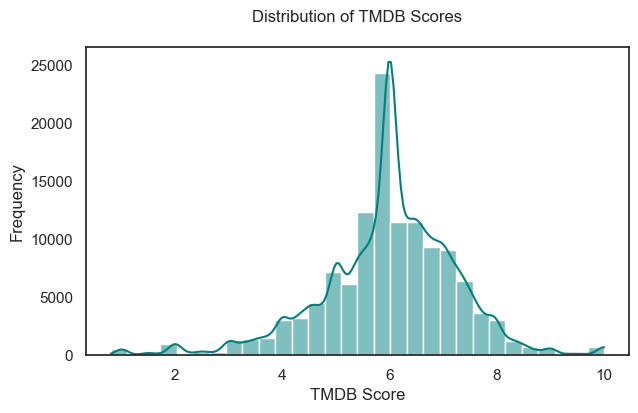

In [71]:
# Distribution of TMDB Scores

plt.figure(figsize=(7,4))
sns.histplot(merged_df['tmdb_score'].dropna(), kde=True, bins=30, color='teal')
plt.title('Distribution of TMDB Scores\n')
plt.xlabel('TMDB Score')
plt.ylabel('Frequency')
plt.show()

# Shows overall quality perception
# Insight : Most content rated between 5–8

### Bivariate Analysis
Bivariate analysis explores the relationship between two variables — one can be categorical or numerical.

**Scatterplot**

A Scatterplot displays individual data points for two numerical variables on an X-Y axis.

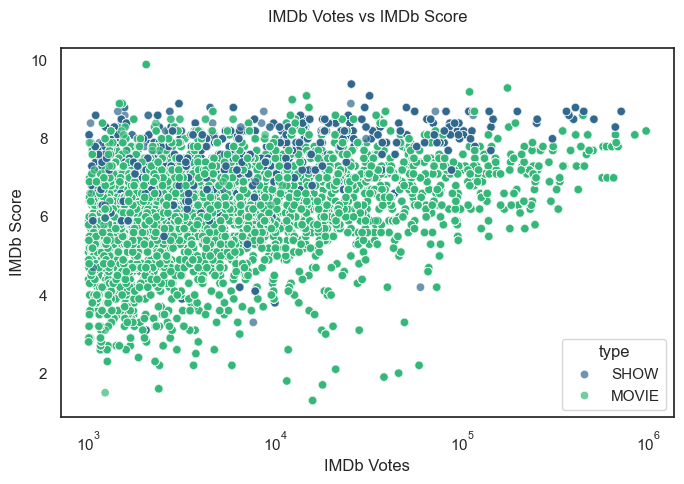

In [72]:
# IMDb Votes vs IMDb Score using a Scatter Plot

filtered_votes = merged_df[(merged_df['imdb_votes'] > 1000) & (merged_df['imdb_votes'] < 1000000)]

plt.figure(figsize=(7, 5))
sns.scatterplot(data=filtered_votes, x='imdb_votes', y='imdb_score', hue='type', alpha=0.7, palette='viridis')
plt.title("IMDb Votes vs IMDb Score\n")
plt.xlabel("IMDb Votes")
plt.ylabel("IMDb Score")
plt.xscale('log')  # Use log scale for better visualization
plt.tight_layout()
plt.show()

# Insight:
# There is a mild positive relationship — titles with higher IMDb votes tend to have slightly higher IMDb scores, though not always consistently.

**Boxplot**

A Boxplot (box-and-whisker plot) summarizes the distribution of a numerical variable using five statistics: minimum, Q1, median, Q3, and maximum.

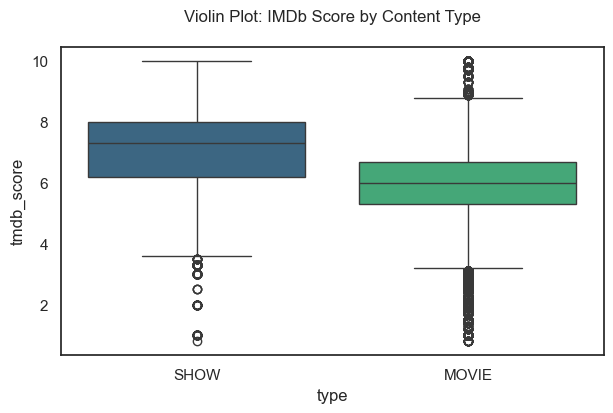

In [73]:
# IMDb Score vary across content types

plt.figure(figsize=(7,4))
sns.boxplot(data=merged_df, x='type', y='tmdb_score', palette='viridis')
plt.title('Violin Plot: IMDb Score by Content Type\n')
plt.show()

# It shows the Distribution, median, and density of IMDb scores per type.
# Insight : Shows tend to have slightly higher average scores, but Movies have more variability.

**Line Chart**

A Line Chart connects data points using lines, typically over a continuous variable like time.

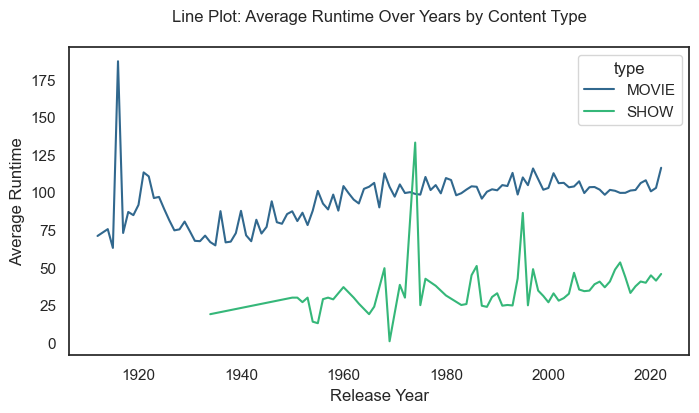

In [74]:
# Prepare data
line_df = merged_df.groupby(['release_year', 'type'])['runtime'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=line_df, x='release_year', y='runtime', hue='type', palette='viridis')
plt.title('Line Plot: Average Runtime Over Years by Content Type\n')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime')
plt.show()

# It shows the  Runtime trend over time for Movies and Shows.
# Insight : Movie runtimes are generally higher, but both types show runtime fluctuations after 2015.

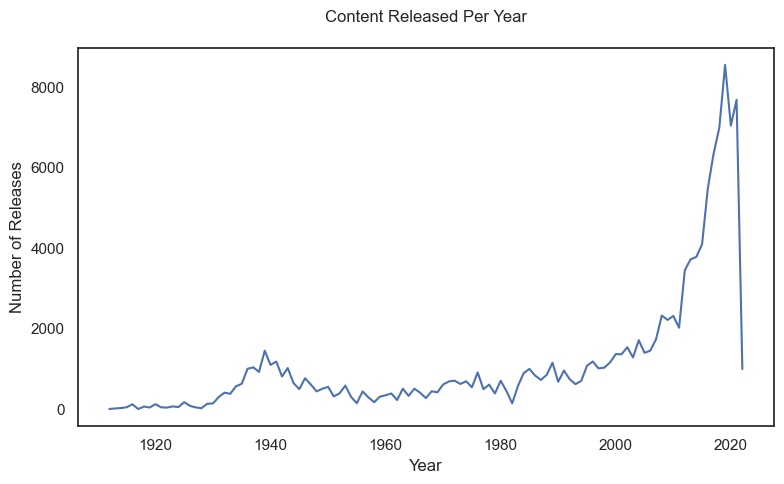

In [75]:
# Number of Releases per Year using a Line Chart

yearly_counts = merged_df['release_year'].dropna().astype(int).value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, palette='viridis')
plt.title("Content Released Per Year\n")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.tight_layout()
plt.show()

# This chart shows the Tracks how many Movies and Shows were released each year over time.
# Insight : There’s a noticeable rise in content releases after 2015, peaking around 2020, 
# indicating Amazon’s aggressive content expansion strategy in recent years.

**Violinplot**

A Violinplot combines aspects of a boxplot and a KDE plot to show the distribution of a numerical variable.

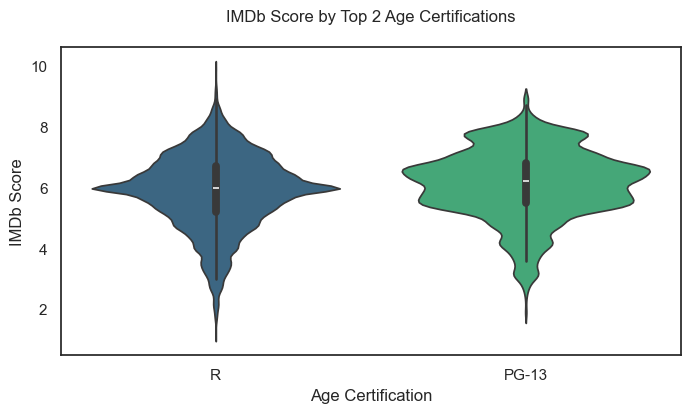

In [76]:
# Select top 2 age certifications
top_2_cert = merged_df['age_certification'].value_counts().nlargest(2).index
filtered_violin = merged_df[merged_df['age_certification'].isin(top_2_cert)]

# Violin Plot
plt.figure(figsize=(8,4))
sns.violinplot(data=filtered_violin, x='age_certification', y='imdb_score', palette='viridis')
plt.title('IMDb Score by Top 2 Age Certifications\n')
plt.xlabel('Age Certification')
plt.ylabel('IMDb Score')
plt.show()

# This chart shows The shape and spread of IMDb scores for content rated R and PG-13.
# Insight:
# R-rated content has slightly higher median IMDb scores and more variability compared to PG-13,
# indicating that mature-rated titles often receive a broader range of audience reception.

### Multivariate Analysis
Multivariate analysis examines three or more variables at the same time.

**Pairplot**

A Pairplot is a type of visualization that shows pairwise relationships between multiple numerical variables in a dataset. It creates a matrix of scatter plots for each variable combination, along with histograms or KDE plots on the diagonals.

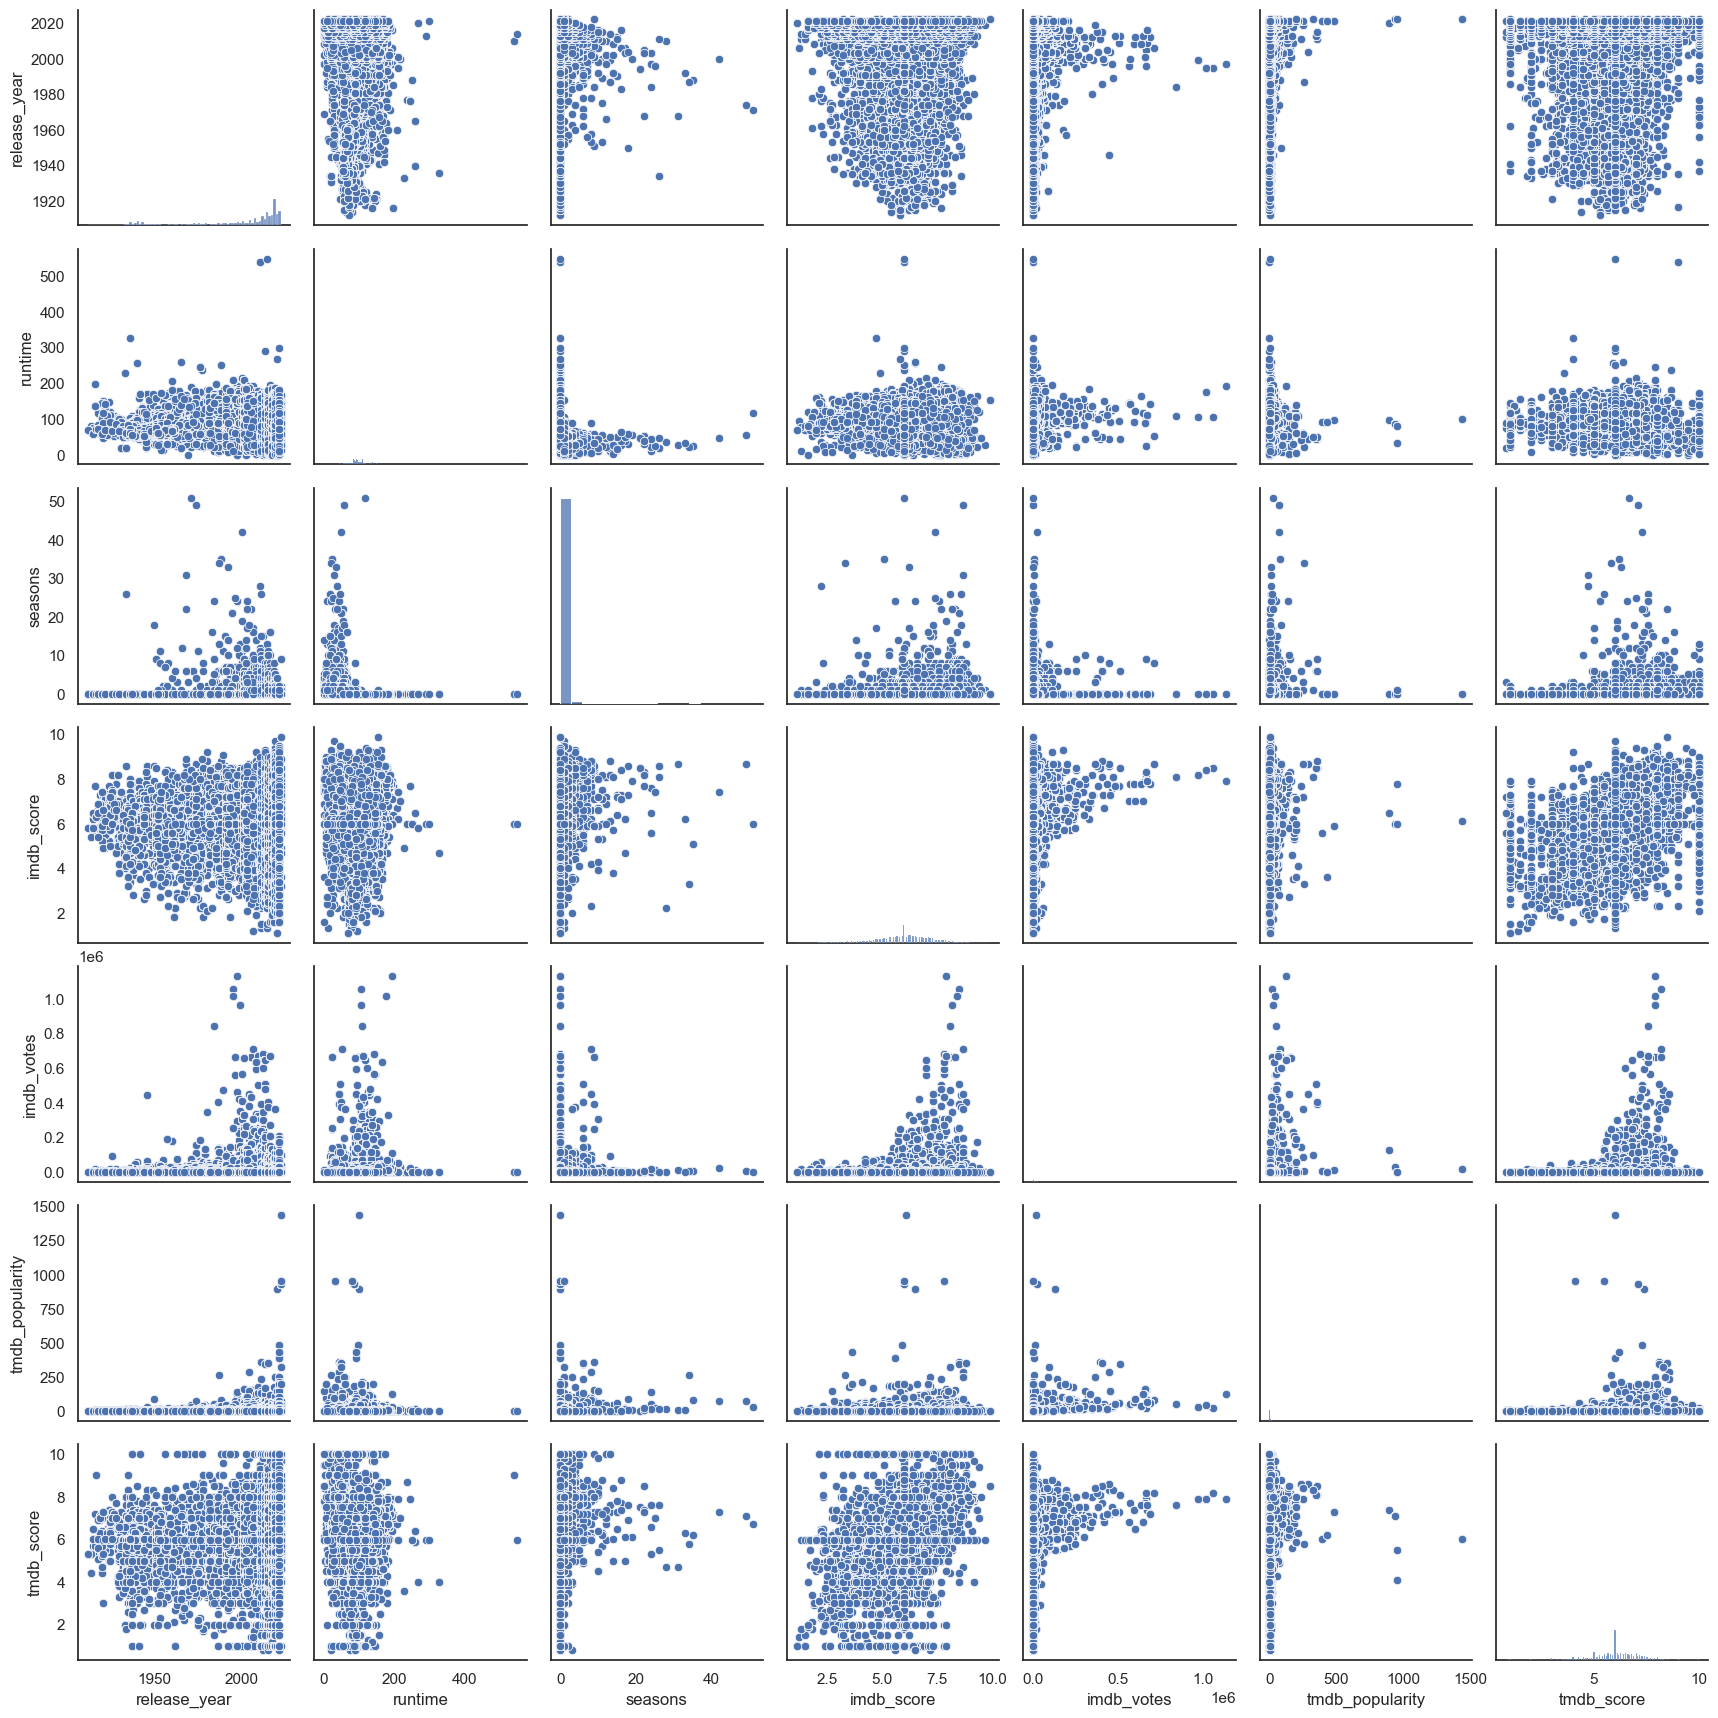

In [77]:
# The pairwise relationships between numerical variables

sns.pairplot(merged_df)
plt.show()

# Insight:
# Pairplot reveals linear and non-linear patterns, clusters,
# and potential correlations between key numeric features — helping identify trends or outliers across multiple variable pairs.

**Heatmap**

A Heatmap is a data visualization that uses color to represent values in a matrix format. It helps quickly identify patterns, trends, and correlations between variables.

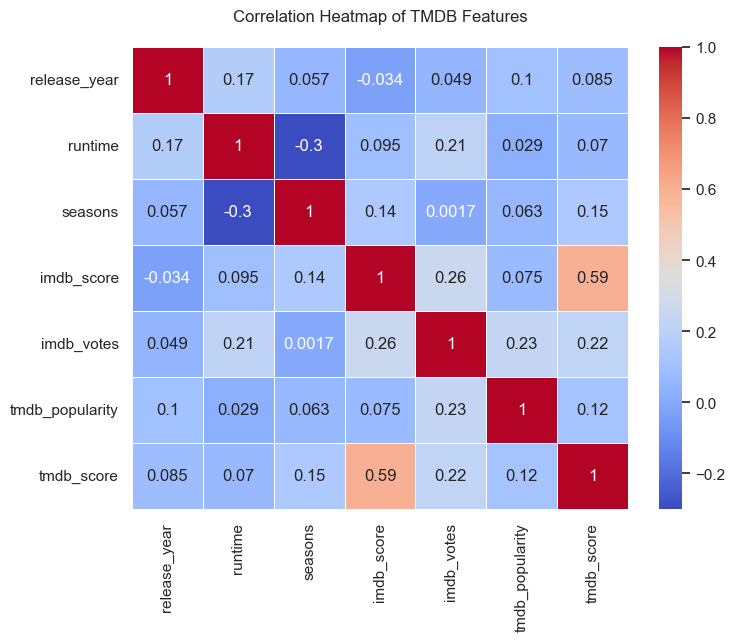

In [78]:
# The correlation between key numerical features 

numeric_cols = merged_df.select_dtypes(include = ['int64','float64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of TMDB Features\n')
plt.show()

# Insight:
# "IMDb votes show a moderate positive correlation with TMDB popularity,
# while IMDb score has weak correlation with most features — indicating that popularity and votes influence each other more than the rating score."

### Solution to Business Objective
To achieve the business objectives, Amazon Prime should focus on curating content around the most popular genres, such as Drama and Comedy, and prioritize age certifications that appeal to wider audiences. Leveraging IMDb ratings and popularity scores can help identify high-performing content for promotion. Additionally, analyzing release year trends and investing in long-form or multi-season series can improve viewer retention. Expanding regional and genre diversity will further enhance user engagement and support strategic content planning.

# Conclusion
This exploratory data analysis of Amazon Prime Video content has provided meaningful insights into the platform’s content distribution, viewer preferences, and performance metrics. By analyzing factors such as content type, genres, age certifications, release trends, IMDb ratings, popularity, and runtime, we identified key patterns that can guide strategic decisions. The analysis revealed that genres like Drama and Comedy dominate the platform, mid-range age certifications attract broader audiences, and high IMDb-rated content aligns with increased popularity. Trends over time show an evolving content strategy, while visualizations like KDE plots, heatmaps, and line charts helped uncover hidden relationships between variables. Overall, this project supports data-driven content planning, enhanced user targeting, and improved viewer satisfaction for Amazon Prime Video.

----